In [1]:
import pandas as pd
import cv2
import numpy as np

In [2]:
RGB_values = pd.DataFrame(columns=['R', 'G', 'B'])
image = cv2.imread("beach.jpg")

# get image shape
numPixels = image.shape
print(numPixels)

y, x = numPixels[0], numPixels[1]
for i, j in zip(range(y), range(x)):
    BGR_values = image[i, j]
    RGB_values.loc[len(RGB_values)] = np.flip(BGR_values)

print(RGB_values)

(1200, 1920, 3)
        R    G    B
0     161  195  240
1     161  195  240
2     160  194  239
3     159  193  238
4     159  193  238
...   ...  ...  ...
1195   53   42   58
1196   49   38   55
1197   47   36   53
1198   49   37   57
1199   49   37   57

[1200 rows x 3 columns]


In [3]:
# plot the RGB values on a graph
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

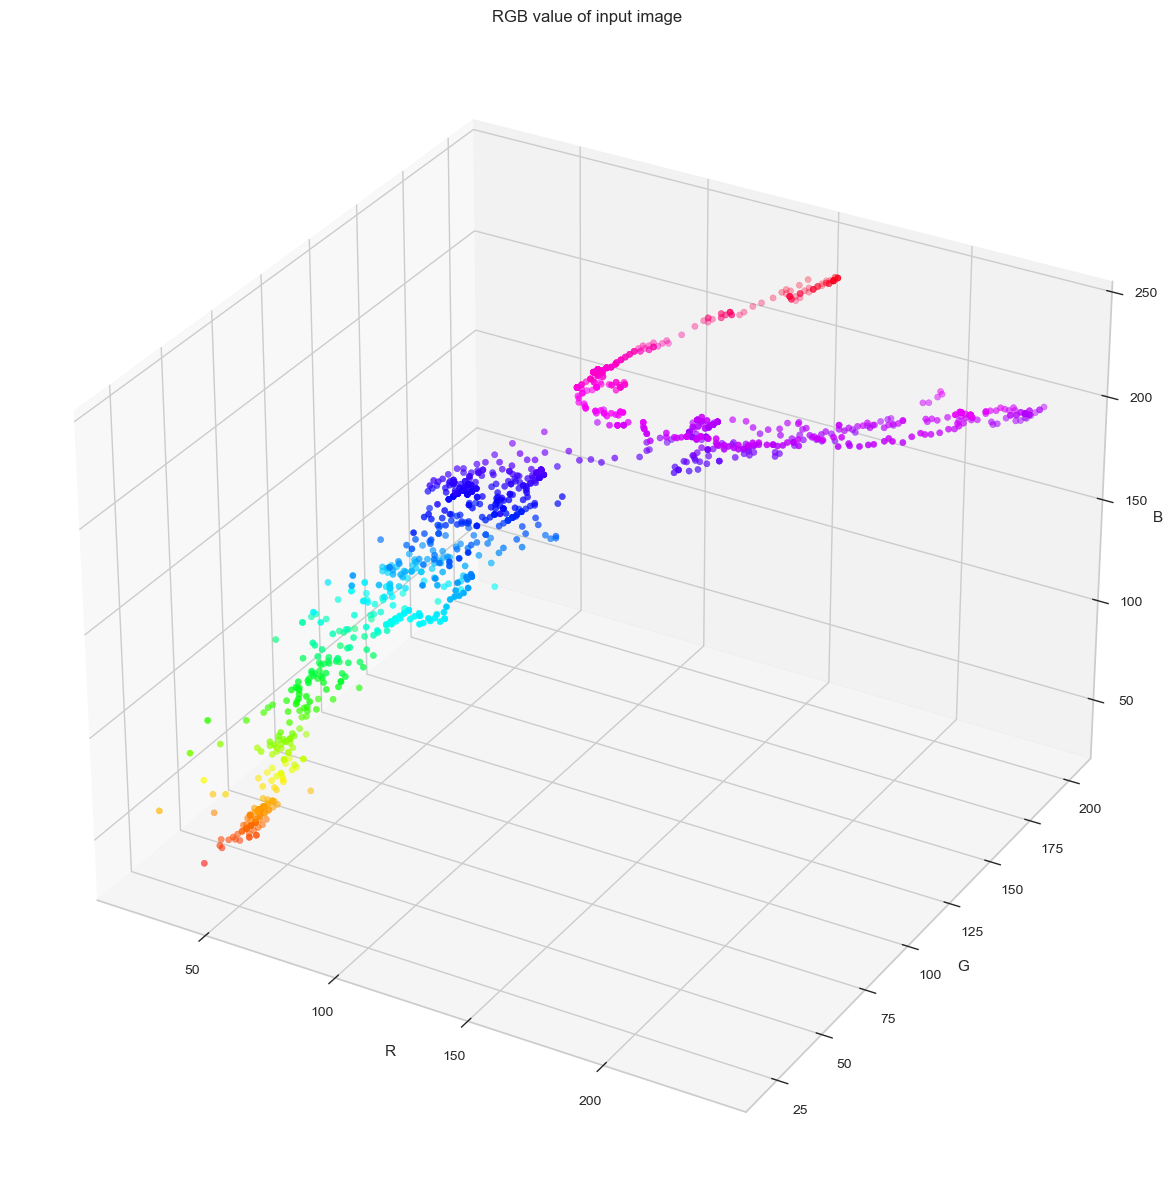

In [17]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
# Data for three-dimensional scattered points
zdata = RGB_values['B']
xdata = RGB_values['R']
ydata = RGB_values['G']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='hsv');

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title('RGB value of input image');

In [5]:
import sklearn.cluster

c:\Users\Anu2001\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anu2001\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anu2001\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anu2001\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

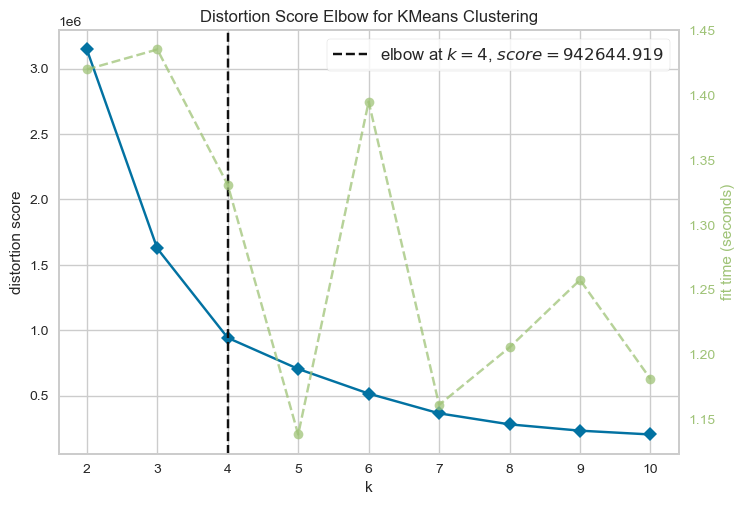

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(sklearn.cluster.KMeans(), k=10)
model.fit(RGB_values.to_numpy());
model.show();
elbow_value = model.elbow_value_

In [ ]:
# using the library
num_clusters = elbow_value
kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
y_clusters = kmeans.fit_predict(RGB_values.to_numpy())

In [25]:
import math
import random

x = RGB_values.to_numpy()
centroid1 = x[random.randint(0,len(x))]
centroids = []
centroids.append([centroid1])
numClusters = elbow_value

# pick cluster centroid with probability proportional to the centroid1
distance = [math.dist(centroid1, x[i])**2 for i in range(len(x))]

for i in range(1, numClusters):
    # so above has just chosen the highest dist ones, but we still want random choice where the probability is depending on the distance
    # also, normalize dists
    # calculates probabilities
    prob = distance/np.sum(distance)
    # choose next centroid with probability proportional to distance squared
    new_centroid = x[np.random.choice(range(len(x)), size=1, p=prob)]
    centroids.append(new_centroid)
    # update distances between newly chosen centroid and other points now
    distance = [math.dist(new_centroid[0], x[i])**2 for i in range(len(x))]


centroids = np.array(centroids)
sorted_points = [[] for _ in range(4)]
for point in x:
    dists = [math.dist(point, np.squeeze(i)) for i in centroids]
    centroid_idx = np.argmin(dists)
    sorted_points[centroid_idx].append(point)
    
# new centroid is mean of the points in each cluster
prev_centroids = centroids[:]

# sorted points is of size num_clusters, num_points in each cluster
centroids = [np.average(i) for i in sorted_points]





In [26]:
centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]

# make sure that none of the centroid values are nan
for points in range(len(centroids)):
    if np.isnan(centroids[points]).any():
        centroids[points] = prev_centroids[points]


In [27]:
colors = []
clusters = []

for i in centroids:
    r, g, b = i
    colors.append((
    r/255,
    g/255,
    b/255
    ))


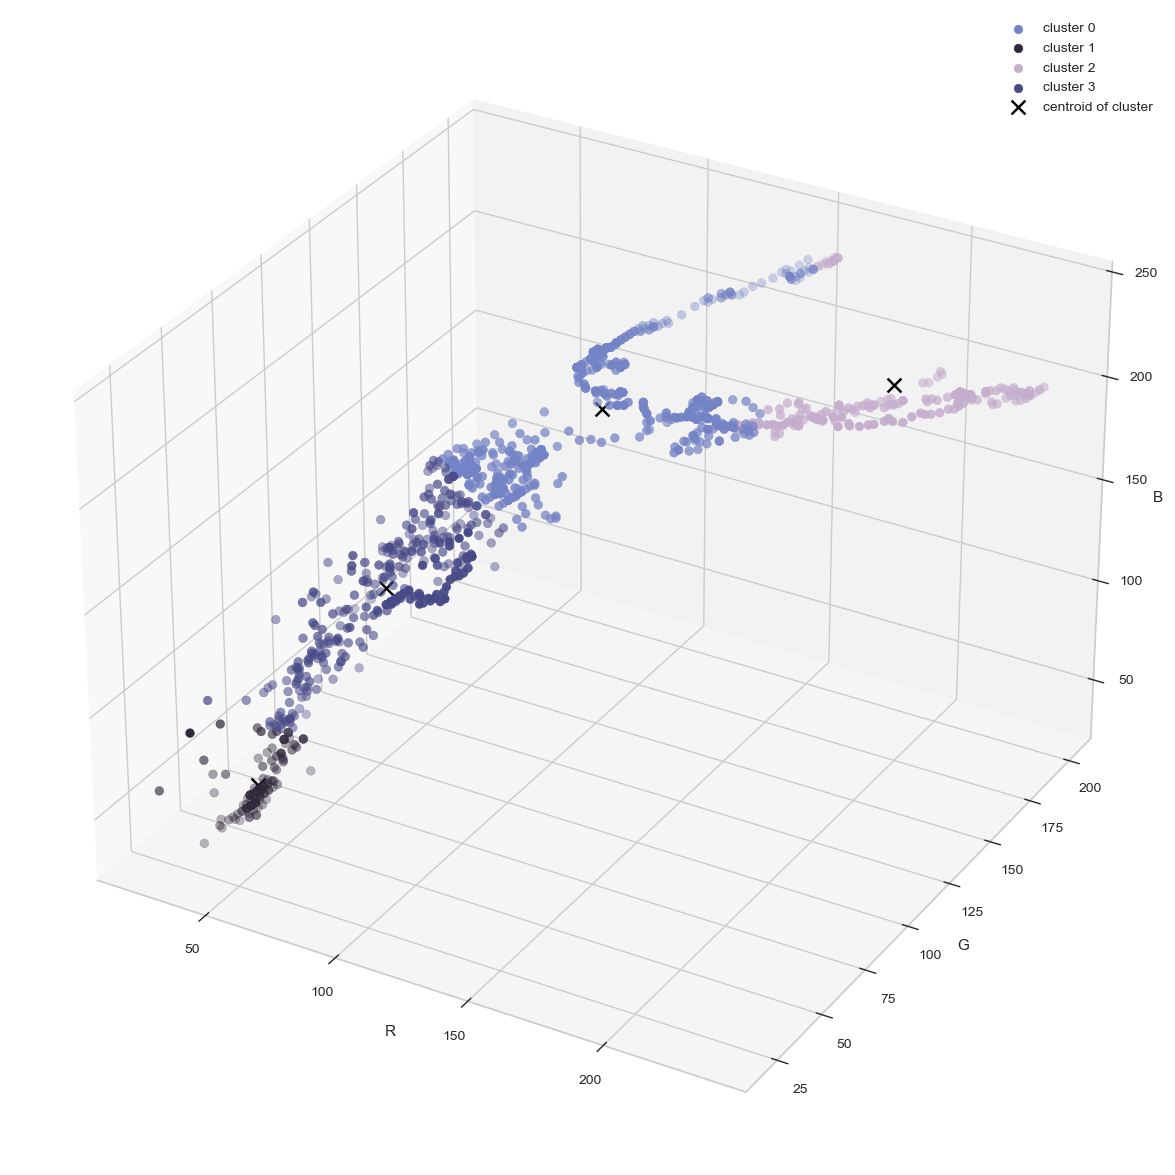

In [29]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')


# plot the sorted clusters

for i in range(len(sorted_points)):
    a, b, c = zip(*sorted_points[i])
    ax.scatter(a,b,c, s = 40 , color = colors[i], label = "cluster "+str(i))
    
ax.scatter(colors[0][0]*255, colors[0][1]*255, colors[0][2]*255, s = 100 , marker = 'x', color = [0,0,0], label = "centroid of cluster")
ax.scatter(colors[1][0]*255, colors[1][1]*255, colors[1][2]*255, s = 100 , marker = 'x', color = [0,0,0])
ax.scatter(colors[2][0]*255, colors[2][1]*255, colors[2][2]*255, s = 100 , marker = 'x', color = [0,0,0])
ax.scatter(colors[3][0]*255, colors[3][1]*255, colors[3][2]*255, s = 100 , marker = 'x', color = [0,0,0])
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

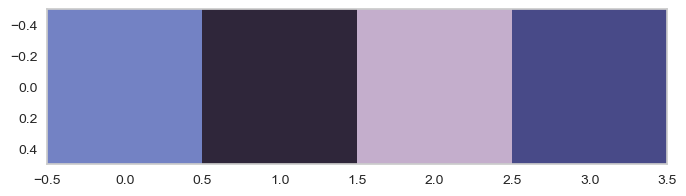

In [28]:
plt.grid(False)
plt.imshow([colors])
plt.show()

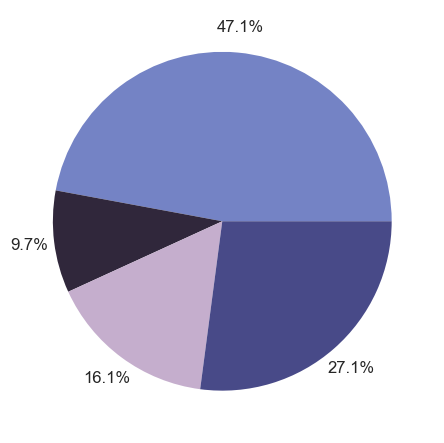

In [32]:
total_points = len(RGB_values.to_numpy())
labels = ['Colour' + str(i+1) for i in range(len(colors))]
sizes = [len(sorted_points[i])/total_points for i in range(len(sorted_points))]
fig, ax = plt.subplots()
ax.pie(sizes,
       colors=colors, autopct='%1.1f%%', pctdistance=1.15);
